In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# import the file
ddi = pd.read_csv('time_series_ddi.csv')

In [3]:
# convert the columns into integer
ddi['net_flows'] = ddi['net_flows'].str.replace(',', '').astype(int)
ddi['investment_income'] = ddi['investment_income'].str.replace(',', '').astype(int)
ddi['investment_position'] = ddi['investment_position'].str.replace(',', '').astype(int)

# convert into year
ddi['year'] = pd.to_datetime(ddi['year'], format='%Y')

In [4]:
# convert the columns into billions
ddi['net_flows'] = ddi['net_flows'] / 1000
ddi['investment_income'] = ddi['investment_income'] / 1000
ddi['investment_position'] = ddi['investment_position'] / 1000

In [7]:
# create a new dataframe just for year on year changes
# Create a copy of the ddi dataframe
ddi_yoy = ddi.copy()
ddi_yoy = ddi_yoy.sort_values(by='year', ascending=False)

# Calculate YoY changes for each column except year
for col in ['net_flows', 'investment_income', 'investment_position']:
    ddi_yoy[f'{col}_yoy'] = ddi_yoy[col].pct_change(periods=-1) * 100

# Drop any NA columns
ddi_yoy = ddi_yoy.dropna()


In [9]:
ddi_yoy

,year,net_flows,investment_income,investment_position,net_flows_yoy,investment_income_yoy,investment_position_yoy
23,2024-01-01,-33.862,43.239,622.085,12.322951,5.773135,-2.624094
22,2023-01-01,-30.147,40.879,638.849,-52.014326,-23.924816,5.285112
21,2022-01-01,-62.825,53.735,606.780,224.291540,-8.648125,11.021457
20,2021-01-01,-19.373,58.822,546.543,90.491642,229.203045,6.094983
19,2020-01-01,-10.170,17.868,515.145,-60.596668,-39.818121,3.366595
18,2019-01-01,-25.810,29.690,498.367,25.060568,10.244699,1.921378
17,2018-01-01,-20.638,26.931,488.972,-14.887826,5.240328,-7.126590
16,2017-01-01,-24.248,25.590,526.493,-27.036380,23.277772,-6.865510
15,2016-01-01,-33.233,20.758,565.304,-19.311919,12.827481,-3.169369
14,2015-01-01,-41.187,18.398,583.807,-23.121290,-24.135087,23.328651


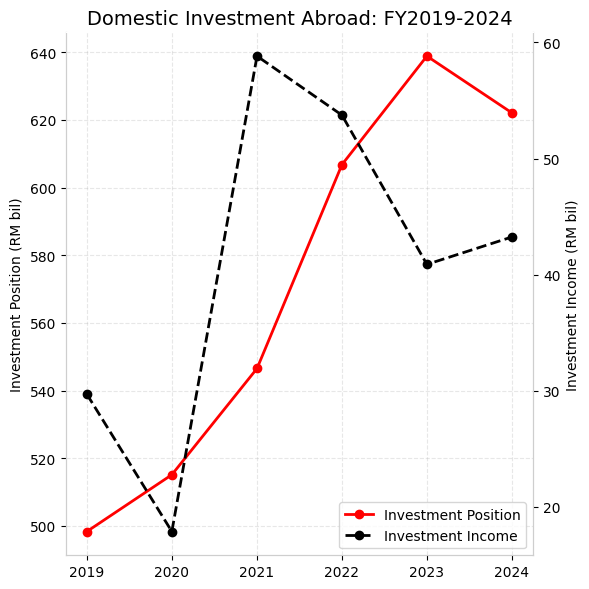

In [10]:
# Filter data from 2019 to 2024
ddi_filter = ddi[ddi['year'] >= '2019-01-01']

# Create combo chart
fig, ax1 = plt.subplots(figsize=(6, 6))

# Create primary y-axis for investment position
ax1.plot(ddi_filter['year'], ddi_filter['investment_position'], 
         color='red', marker='o', linewidth=2, label='Investment Position')
ax1.set_ylabel('Investment Position (RM bil)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Plot investment income on secondary y-axis
ax2 = ax1.twinx()
ax2.plot(ddi_filter['year'], ddi_filter['investment_income'], 
         color='black', marker='o', linestyle='--', linewidth=2, label='Investment Income')
ax2.set_ylabel('Investment Income (RM bil)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Set title
ax1.set_title('Domestic Investment Abroad: FY2019-2024', fontsize=14, color='black')

# Set spine colors
for ax in [ax1, ax2]:
    for spine in ax.spines.values():
        spine.set_edgecolor('#cecece')
    ax.spines['top'].set_color('white')

# Add legends
bars1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(bars1 + lines2, labels1 + labels2, loc='lower right')

# Add grid
ax1.grid(True, alpha=0.3, linestyle='--')

# # Get the latest data points
# latest_year = ddi_filter['year'].iloc[-1]
# latest_position = ddi_filter['investment_position'].iloc[-1]
# latest_income = ddi_filter['investment_income'].iloc[-1]

# # Add data callout for investment position (ax1)
# ax1.annotate(f'{latest_position:.0f}', 
#              xy=(latest_year, latest_position),
#              xytext=(-230, 10), textcoords='offset points',
#              bbox=dict(boxstyle='square,pad=0.3', facecolor='black', edgecolor='black'),
#              fontsize=10, color='white')

# # Add data callout for investment income (ax2)
# ax2.annotate(f'{latest_income:.0f}', 
#              xy=(latest_year, latest_income),
#              xytext=(-230, -10), textcoords='offset points',
#              bbox=dict(boxstyle='square,pad=0.3', facecolor='black', edgecolor='black'),
#              fontsize=10, color='white')

# # Add horizontal lines to show latest datapoint levels
# ax1.axhline(y=latest_position, color='black', linestyle='--', alpha=0.7, linewidth=1)
# ax2.axhline(y=latest_income, color='black', linestyle='--', alpha=0.7, linewidth=1)


plt.tight_layout()
plt.show()